In [216]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [217]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [266]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore", category=FutureWarning)

In [267]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [268]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
test_id = test['user_id'].values

In [269]:
train = train.drop(['user_id'], axis=1)
test = test.drop(['user_id'], axis=1)

In [270]:
train['target'] = train['target'].astype('category')

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  object  
 10  subscription_type                  10000 non-null  object  
 11  customer_inquiry_history           10000 n

In [272]:
train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [273]:
# preferred_difficulty_level 열 인코딩
train.loc[train['preferred_difficulty_level'].values == 'Low','preferred_difficulty_level'] = 0
train.loc[train['preferred_difficulty_level'].values == 'Medium','preferred_difficulty_level'] = 1
train.loc[train['preferred_difficulty_level'].values == 'High','preferred_difficulty_level'] = 2
train['preferred_difficulty_level'] = train['preferred_difficulty_level'].astype(int)

test.loc[test['preferred_difficulty_level'].values == 'Low','preferred_difficulty_level'] = 0
test.loc[test['preferred_difficulty_level'].values == 'Medium','preferred_difficulty_level'] = 1
test.loc[test['preferred_difficulty_level'].values == 'High','preferred_difficulty_level'] = 2
test['preferred_difficulty_level'] = test['preferred_difficulty_level'].astype(int)

In [274]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  int32  
 10  subscription_type                  10000 non-null  object 
 11  customer_inquiry_history           10000 non-null  int6

In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  object  
 11  customer_inquiry_history           10000 n

In [276]:
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,Basic,2,0,1


In [277]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()
categoric_col =['subscription_type']
label_encoders = {}
for col in categoric_col:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].fit_transform(test[col])

In [278]:
# 'payment_pattern' 열에 대한 고유값 확인
unique_values = train['payment_pattern'].unique()

# 각 고유값에 대해 새로운 열 생성 및 0 또는 1로 설정
for value in unique_values:
    train[f'payment_pattern_{value}'] = (train['payment_pattern'] == value).astype(int)

# 기존 'payment_pattern' 열 삭제
train.drop('payment_pattern', axis=1, inplace=True)

for value in unique_values:
    test[f'payment_pattern_{value}'] = (test['payment_pattern'] == value).astype(int)

# 기존 'payment_pattern' 열 삭제
test.drop('payment_pattern', axis=1, inplace=True)

In [279]:
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,...,customer_inquiry_history,target,payment_pattern_5,payment_pattern_6,payment_pattern_7,payment_pattern_0,payment_pattern_1,payment_pattern_3,payment_pattern_4,payment_pattern_2
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,...,4,0,1,0,0,0,0,0,0,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,...,1,1,0,1,0,0,0,0,0,0
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,...,0,1,0,0,1,0,0,0,0,0
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,...,1,1,0,0,0,1,0,0,0,0
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,...,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,...,1,1,0,0,0,0,1,0,0,0
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,...,2,1,0,0,1,0,0,0,0,0
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,...,1,1,0,1,0,0,0,0,0,0
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,...,2,1,0,0,0,1,0,0,0,0


In [280]:
X = train[train.columns.drop('target')]
Y = train['target']

In [232]:
# X와 Y로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드 및 전처리
# 예: X는 특징 변수, y는 범주형 목표 변수

# RandomForest 모델 생성 및 학습
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [174]:
# 예측
y_pred_rf = model_rf.predict(X_test)

In [175]:
# 정확도 평가
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Accuracy: {accuracy_rf}")

RandomForest Accuracy: 0.588


In [202]:
#랜덤포레스트 평가 및 테스트
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_rf, average='macro'))

0.43928413459902693


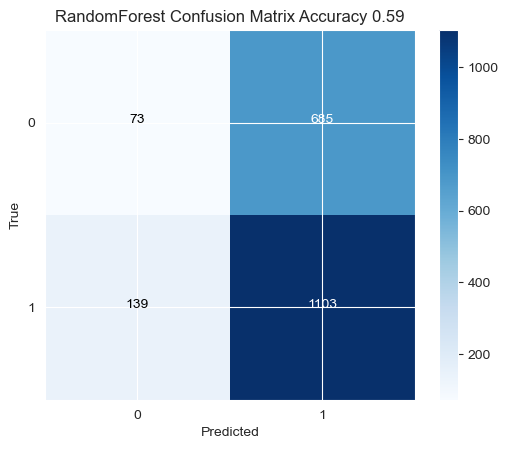

In [183]:
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_rf)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('RandomForest Confusion Matrix Accuracy {}'.format(round((accuracy_rf),2)))
plt.colorbar()

classes = model_rf.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [233]:
import xgboost as xgb

# 데이터셋 로드 및 전처리
# 예: X는 특징 변수, y는 범주형 목표 변수


# XGBoost 모델 생성 및 학습
model_xgb = xgb.XGBClassifier(random_state=2200,objective="multi:softmax", num_class=2, n_estimators=80)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_class=2, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [234]:
y_pred_xgb = model_xgb.predict(X_test)

In [235]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.588


In [236]:
print(f1_score(y_test,y_pred_xgb , average='macro'))

0.5131957047791893


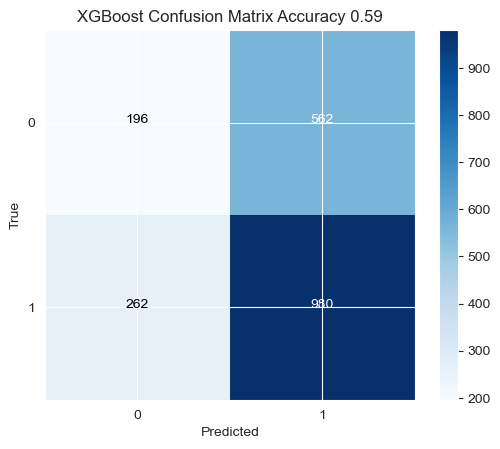

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_xgb)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix Accuracy {}'.format(round((accuracy_xgb),2)))
plt.colorbar()

classes = model_xgb.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [198]:
from catboost import CatBoostClassifier


# CatBoost 모델 생성 및 학습
model_catboost = CatBoostClassifier(iterations=150, depth=10, learning_rate=0.01, loss_function='MultiClass', cat_features=[0, 1])
model_catboost.fit(X_train, y_train)

0:	learn: 0.6923384	total: 59ms	remaining: 8.79s
1:	learn: 0.6915678	total: 116ms	remaining: 8.57s
2:	learn: 0.6907757	total: 135ms	remaining: 6.63s
3:	learn: 0.6900270	total: 198ms	remaining: 7.21s
4:	learn: 0.6892488	total: 262ms	remaining: 7.59s
5:	learn: 0.6885747	total: 335ms	remaining: 8.05s
6:	learn: 0.6878853	total: 414ms	remaining: 8.45s
7:	learn: 0.6871372	total: 480ms	remaining: 8.52s
8:	learn: 0.6864526	total: 546ms	remaining: 8.56s
9:	learn: 0.6857237	total: 615ms	remaining: 8.61s
10:	learn: 0.6850586	total: 677ms	remaining: 8.55s
11:	learn: 0.6843492	total: 740ms	remaining: 8.51s
12:	learn: 0.6836717	total: 766ms	remaining: 8.07s
13:	learn: 0.6829784	total: 826ms	remaining: 8.02s
14:	learn: 0.6823604	total: 885ms	remaining: 7.96s
15:	learn: 0.6816995	total: 944ms	remaining: 7.9s
16:	learn: 0.6811125	total: 1.01s	remaining: 7.88s
17:	learn: 0.6805098	total: 1.04s	remaining: 7.65s
18:	learn: 0.6798538	total: 1.1s	remaining: 7.61s
19:	learn: 0.6792144	total: 1.16s	remaining:

In [199]:
# 예측
y_pred_catboost = model_catboost.predict(X_test)

In [200]:
# 정확도 평가
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")

CatBoost Accuracy: 0.621


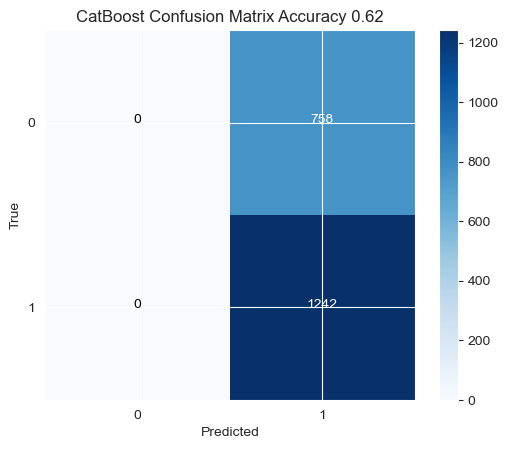

In [201]:
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_catboost)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('CatBoost Confusion Matrix Accuracy {}'.format(round((accuracy_catboost),2)))
plt.colorbar()

classes = model_catboost.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  int32   
 11  customer_inquiry_history           10000 n

In [281]:
pred_final = model_xgb.predict(test)

In [282]:
submit = pd.DataFrame({
    'user_id': test_id,
    'target': pred_final.flatten()
})

In [283]:
submit.to_csv("../submission_data/3.csv", index = False)